In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import os
from skimage.feature import hog
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from skimage.feature import daisy
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import img_to_array
from keras.utils import load_img


In [3]:
import os
for dirname, _, filenames in os.walk('D:\CV\Augmented_data'):
    for filename in filenames:
        os.path.join(dirname, filename)

In [20]:
DATADIR = 'D:\CV\Augmented_data'
CATEGORIES = ['backhand','forehand']
IMG_SIZE=200

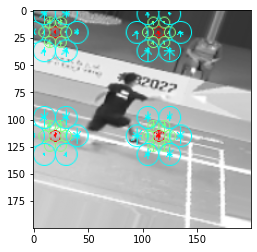

In [21]:
for category in CATEGORIES:
    path=os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
        img_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
        descs, img_array = daisy(img_array, step=95, radius=20, rings=2, histograms=6,
                         orientations=8,visualize=True)

        plt.imshow(img_array)
        plt.show()
        break
    break

In [ ]:
training_data=[]
def create_training_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR, category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                descs, new_array = daisy(new_array, step=180, radius=58, rings=2, histograms=6,
                         orientations=8, visualize=True)
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()      

In [ ]:
print(len(training_data))

In [15]:
lenofimage = len(training_data)

In [16]:
X=[]
y=[]

for categories, label in training_data:
    X.append(categories)
    y.append(label)
X= np.array(X).reshape(lenofimage,-1)

In [17]:
X.shape

(1033, 30000)

In [18]:
X = X/255.0

In [19]:
X[1]

array([0.00194138, 0.0034122 , 0.0034122 , ..., 0.00204537, 0.00204537,
       0.00204537])

In [20]:
y=np.array(y)

In [21]:
y.shape

(1033,)

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

# SVM

In [23]:
from sklearn.svm import SVC
svc = SVC(kernel='linear',gamma='auto')
svc.fit(X_train, y_train)

SVC(gamma='auto', kernel='linear')

In [24]:
y2 = svc.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score
print("Accuracy on unknown data is",accuracy_score(y_test,y2))

Accuracy on unknown data is 0.5444015444015444


In [26]:
# to create nice confusion metrics
import seaborn as sns

Text(0.5, 1.0, 'Accuracy Score: 0.5444015444015444')

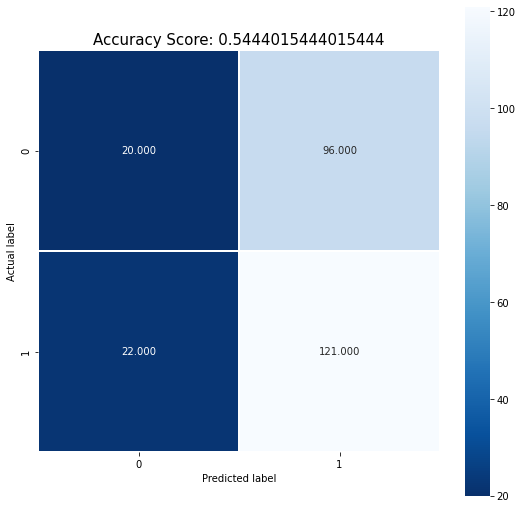

In [27]:
cm = confusion_matrix(y_test,y2)
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot=True, fmt='.3f', linewidths=.5, square=True,cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test,y2))
plt.title(all_sample_title,size=15)

In [28]:
from sklearn.metrics import classification_report
print("Accuracy on unknown data is",classification_report(y_test,y2))

Accuracy on unknown data is               precision    recall  f1-score   support

           0       0.48      0.17      0.25       116
           1       0.56      0.85      0.67       143

    accuracy                           0.54       259
   macro avg       0.52      0.51      0.46       259
weighted avg       0.52      0.54      0.48       259



In [29]:
result = pd.DataFrame({'original' : y_test,'predicted' : y2})

In [30]:
result

,original,predicted
0,1,1
1,0,0
2,0,1
3,1,1
4,1,1
...,...,...
254,0,1
255,1,1
256,1,1
257,0,1


# KNN

In [31]:
from sklearn.neighbors import KNeighborsClassifier
# since its a multi-class prediction, in order to prevent error we need some library
from sklearn.multiclass import OneVsRestClassifier

In [32]:
knn = OneVsRestClassifier(KNeighborsClassifier())

In [33]:
knn.fit(X_train,y_train)

OneVsRestClassifier(estimator=KNeighborsClassifier())

In [34]:
# predict for one observation
knn.predict(X_test[0].reshape(1,-1))

array([0])

In [35]:
# predict for multiple observation (images) at once
knn.predict(X_test[0:10])

array([0, 0, 1, 0, 1, 1, 0, 0, 1, 1])

In [36]:
# make prediction on entire test data
predictions = knn.predict(X_test)

In [37]:
print('KNN Accuracy: %.3f' % accuracy_score(y_test,predictions))

KNN Accuracy: 0.664


Text(0.5, 1.0, 'Accuracy Score: 0.6640926640926641')

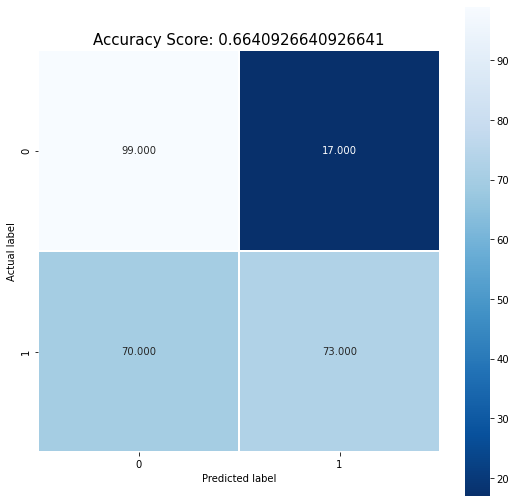

In [38]:
cm = confusion_matrix(y_test,predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot=True, fmt='.3f', linewidths=.5, square=True,cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test,predictions))
plt.title(all_sample_title,size=15)

In [39]:
from sklearn.metrics import classification_report
print("Accuracy on unknown data is",classification_report(y_test,predictions))

Accuracy on unknown data is               precision    recall  f1-score   support

           0       0.59      0.85      0.69       116
           1       0.81      0.51      0.63       143

    accuracy                           0.66       259
   macro avg       0.70      0.68      0.66       259
weighted avg       0.71      0.66      0.66       259



In [40]:
result = pd.DataFrame({'original' : y_test,'predicted' : predictions})

In [41]:
result

,original,predicted
0,1,0
1,0,0
2,0,1
3,1,0
4,1,1
...,...,...
254,0,0
255,1,0
256,1,1
257,0,0


# Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
clf = RandomForestClassifier(n_estimators = 500, 
                             max_depth = 4, 
                             max_features = 3, 
                             bootstrap = True, 
                             random_state = 18).fit(X_train, y_train)

In [44]:
# Create our predictions
prediction = clf.predict(X_test)
# Display accuracy score
accuracy_score(y_test, prediction)

0.6640926640926641

Text(0.5, 1.0, 'Accuracy Score: 0.6640926640926641')

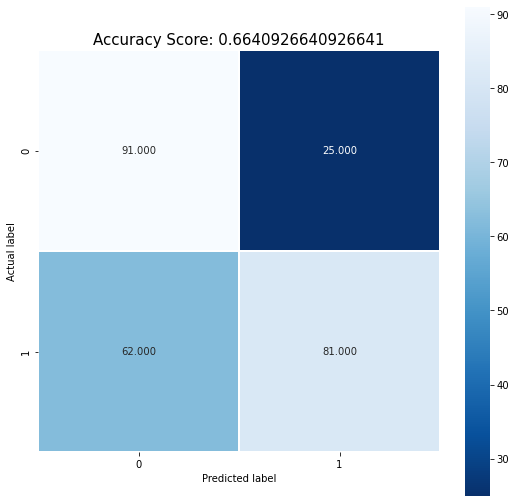

In [45]:
# Create confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,prediction)
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot=True, fmt='.3f', linewidths=.5, square=True,cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test,prediction))
plt.title(all_sample_title,size=15)

In [46]:
from sklearn.metrics import classification_report
print("Accuracy on unknown data is",classification_report(y_test,prediction))

Accuracy on unknown data is               precision    recall  f1-score   support

           0       0.59      0.78      0.68       116
           1       0.76      0.57      0.65       143

    accuracy                           0.66       259
   macro avg       0.68      0.68      0.66       259
weighted avg       0.69      0.66      0.66       259



In [47]:
result = pd.DataFrame({'original' : y_test,'predicted' : prediction})

In [48]:
result

,original,predicted
0,1,1
1,0,0
2,0,1
3,1,0
4,1,1
...,...,...
254,0,0
255,1,0
256,1,1
257,0,0


# K-Means

In [49]:
from sklearn.cluster import KMeans

In [50]:
kmeans = KMeans(n_clusters=2, random_state=0)
clusters = kmeans.fit(X_train,y_train)

In [51]:
# predict for one observation
kmeans.predict(X_test[0].reshape(1,-1))

array([1])

In [52]:
# predict for multiple observation (images) at once
kmeans.predict(X_test[0:10])

array([1, 0, 1, 0, 1, 0, 1, 1, 1, 0])

In [53]:
# make prediction on entire test data
predictions = kmeans.predict(X_test)

In [54]:
print('KMeans Accuracy: %.3f' % accuracy_score(y_test,predictions))

KMeans Accuracy: 0.556


Text(0.5, 1.0, 'Accuracy Score: 0.555984555984556')

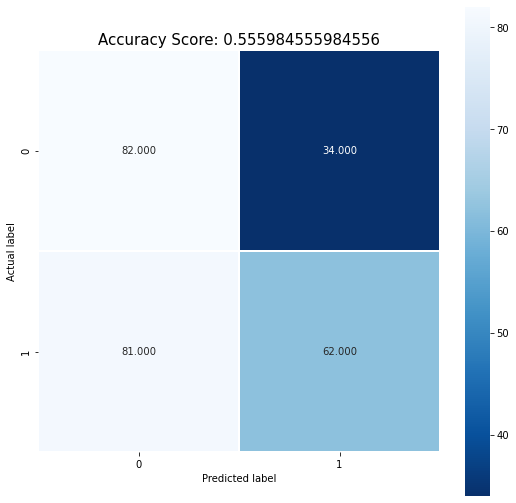

In [55]:
cm = confusion_matrix(y_test,predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot=True, fmt='.3f', linewidths=.5, square=True,cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test,predictions))
plt.title(all_sample_title,size=15)

In [56]:
from sklearn.metrics import classification_report
print("Accuracy on unknown data is",classification_report(y_test,predictions))

Accuracy on unknown data is               precision    recall  f1-score   support

           0       0.50      0.71      0.59       116
           1       0.65      0.43      0.52       143

    accuracy                           0.56       259
   macro avg       0.57      0.57      0.55       259
weighted avg       0.58      0.56      0.55       259



In [57]:
result = pd.DataFrame({'original' : y_test,'predicted' : predictions})

In [58]:
result

,original,predicted
0,1,1
1,0,0
2,0,1
3,1,0
4,1,1
...,...,...
254,0,1
255,1,0
256,1,0
257,0,0
